<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Pandas for Exploratory Data Analysis

_Author: Kevin Markham (Washington, D.C.)_

---

## Learning Objectives

- Define what Pandas is and how it relates to data science.
- Manipulate Pandas `DataFrames` and `Series`.
- Filter and sort data using Pandas.
- Manipulate `DataFrame` columns.
- Know how to handle null and missing values.

## Lesson Guide

- [What Is Pandas?](#pandas)
- [Reading Files, Selecting Columns, and Summarizing](#reading-files)
    - [Exercise 1](#exercise-one)
    
    
- [Filtering and Sorting](#filtering-and-sorting)
    - [Exercise 2](#exercise-two)
    
    
- [Renaming, Adding, and Removing Columns](#columns)
- [Handling Missing Values](#missing-values)
    - [Exercise 3](#exercise-three)
    
    
- [Split-Apply-Combine](#split-apply-combine)
    - [Exercise 4](#exercise-four)
    
    
- [Selecting Multiple Columns and Filtering Rows](#multiple-columns)
- [Joining (Merging) DataFrames](#joining-dataframes)
- [OPTIONAL: Other Commonly Used Features](#other-features)
- [OPTIONAL: Other Less Used Features of Pandas](#uncommon-features)
- [Summary](#summary)

<a id="pandas"></a>

## What Is Pandas?

- **Objective:** Define what Pandas is and how it relates to data science.

Pandas is a Python library that primarily adds two new datatypes to Python: `DataFrame` and `Series`.

- A `Series` is a sequence of items, where each item has a unique label (called an `index`).
- A `DataFrame` is a table of data. Each row has a unique label (the `row index`), and each column has a unique label (the `column index`).
- Note that each column in a `DataFrame` can be considered a `Series` (`Series` index).

> Behind the scenes, these datatypes use the NumPy ("Numerical Python") library. NumPy primarily adds the `ndarray` (n-dimensional array) datatype to Pandas. An `ndarray` is similar to a Python list — it stores ordered data. However, it differs in three respects:
> - Each element has the same datatype (typically fixed-size, e.g., a 32-bit integer).
> - Elements are stored contiguously (immediately after each other) in memory for fast retrieval.
> - The total size of an `ndarray` is fixed.

> Storing `Series` and `DataFrame` data in `ndarray`s makes Pandas faster and uses less memory than standard Python datatypes. Many libraries (such as scikit-learn) accept `ndarray`s as input rather than Pandas datatypes, so we will frequently convert between them.


### Using Pandas

Pandas is frequently used in data science because it offers a large set of commonly used functions, is relatively fast, and has a large community. Because many data science libraries also use NumPy to manipulate data, you can easily transfer data between libraries (as we will often do in this class!).

Pandas is a large library that typically takes a lot of practice to learn. It heavily overrides Python operators, resulting in odd-looking syntax. For example, given a `DataFrame` called `cars` which contains a column `mpg`, we might want to view all cars with mpg over 35. To do this, we might write: `cars[cars['mpg'] > 35]`. In standard Python, this would most likely give a syntax error. (**Challenge:** Using only built-in datatypes, can you define `cars` and `mpg` to make this expression valid?)

Pandas also highly favors certain patterns of use. For example, looping through a `DataFrame` row by row is highly discouraged. Instead, Pandas favors using **vectorized functions** that operate column by column. (This is because each column is stored separately as an `ndarray`, and NumPy is optimized for operating on `ndarray`s.)

Do not be discouraged if Pandas feels overwhelming. Gradually, as you use it, you will become familiar with which methods to use and the "Pandas way" of thinking about and manipulating data.

### Class Methods and Attributes

Pandas `DataFrame`s are Pandas class objects and therefore come with attributes and methods. To access these, follow the variable name with a dot. For example, given a `DataFrame` called `users`:

```
- users.index       # accesses the `index` attribute -- note there are no parentheses. attributes are not callable
- users.head()      # calls the `head` method (since there are open/closed parentheses)
- users.head(10)    # calls the `head` method with parameter `10`, indicating the first 10 rows. this is the same as:
- users.head(n=10)  # calls the `head` method, setting the named parameter `n` to have a value of `10`.
```

We know that the `head` method accepts one parameter with an optional name of `n` because it is in the documentation for that method. Let's see how to view the documentation next.

### Viewing Documentation

There are a few ways to find more information about a method.

**Method 1:** In Jupyter, you can quickly view documentation for a method by following the method name by a `?`, as follows:

```
users.head?
```

> ```
Signature: users.head(n=5)
Docstring: Returns first n rows
```

Notice that we would normally invoke this method by calling `users.head(5)`. One quirk of IPython is that the `?` symbol must be the last character in the cell. Otherwise, it might not work.

> The `?` is a shortcut for the built-in Python function `help`, which returns the method's docstring. For example:
> ```
help(users.head)
```

**Method 2:** You can also search online for the phrase "`DataFrame head`", since you are calling the method `head` on the `users` object, which happens to be a `DataFrame`. (`type(users) => pandas.DataFrame`)

You can alternatively search online for `pandas head`, but be careful! `DataFrame` and `Series` both have a `head` method, so make sure you view the documentation for the correct one since they might be called differently. You will know you are looking at the correct documentation page because it will say `DataFrame.head` at the top, instead of `Series.head`.

## Pandas

In [132]:
# Load Pandas into Python
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

<a id="reading-files"></a>
### Reading Files, Selecting Columns, and Summarizing

In [133]:
users = pd.read_csv('../../data/user.tbl', sep='|')

**Examine the users data.**

In [134]:
users                   # Print the first 30 and last 30 rows.

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [135]:
type(users)             # DataFrame

pandas.core.frame.DataFrame

In [136]:
users.head()            # Print the first five rows.

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [137]:
users.head(10)          # Print the first 10 rows.

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [138]:
users.tail()            # Print the last five rows.

,user_id,age,gender,occupation,zip_code
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209
942,943,22,M,student,77841


In [139]:
 # The row index (aka "the row labels" — in this case integers)
users.index            

RangeIndex(start=0, stop=943, step=1)

In [140]:
# Column names (which is "an index")
users.columns

Index(['user_id', 'age', 'gender', 'occupation', 'zip_code'], dtype='object')

In [141]:
# Datatypes of each column — each column is stored as an ndarray, which has a datatype
users.dtypes

user_id        int64
age            int64
gender        object
occupation    object
zip_code      object
dtype: object

In [142]:
# Number of rows and columns
users.shape

(943, 5)

In [143]:
# All values as a NumPy array
users.values

array([[1, 24, 'M', 'technician', '85711'],
       [2, 53, 'F', 'other', '94043'],
       [3, 23, 'M', 'writer', '32067'],
       ...,
       [941, 20, 'M', 'student', '97229'],
       [942, 48, 'F', 'librarian', '78209'],
       [943, 22, 'M', 'student', '77841']], dtype=object)

In [144]:
# Concise summary (including memory usage) — useful to quickly see if nulls exist
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
user_id       943 non-null int64
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip_code      943 non-null object
dtypes: int64(2), object(3)
memory usage: 36.9+ KB


** Select or index data.**<br>
Pandas `DataFrame`s have structural similarities with Python-style lists and dictionaries.  
In the example below, we select a column of data using the name of the column in a similar manner to how we select a dictionary value with the dictionary key.

In [145]:
# Select a column — returns a Pandas Series (essentially an ndarray with an index)
users['gender'].shape

(943,)

In [146]:
users[['gender']].shape

(943, 1)

In [147]:
# DataFrame columns are Pandas Series.
type(users['gender'])

pandas.core.series.Series

In [148]:
type(users[['gender']])

pandas.core.frame.DataFrame

In [149]:
# Select one column using the DataFrame attribute.
users.gender

# While a useful shorthand, these attributes only exist
# if the column name has no punctuations or spaces.

0      M
1      F
2      M
3      M
4      F
5      M
6      M
7      M
8      M
9      M
10     F
11     F
12     M
13     M
14     F
15     M
16     M
17     F
18     M
19     F
20     M
21     M
22     F
23     F
24     M
25     M
26     F
27     M
28     M
29     M
      ..
913    F
914    M
915    M
916    F
917    M
918    M
919    F
920    F
921    F
922    M
923    M
924    F
925    M
926    M
927    M
928    M
929    F
930    M
931    M
932    M
933    M
934    M
935    M
936    M
937    F
938    F
939    M
940    M
941    F
942    M
Name: gender, Length: 943, dtype: object

**Summarize (describe) the data.**<br>
Pandas has a bunch of built-in methods to quickly summarize your data and provide you with a quick general understanding.

In [150]:
# Describe all numeric columns.
users.describe()

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [151]:
# Describe all object columns (can include multiple types).
type(users.describe(include=['object']))

pandas.core.frame.DataFrame

In [152]:
a = users.describe(include=['object'])


In [153]:
a.head()

,gender,occupation,zip_code
count,943,943,943
unique,2,21,795
top,M,student,55414
freq,670,196,9


In [154]:
a['zip_counts'] = [len(a.zip_code), 19, 45, 29]

In [155]:
a

,gender,occupation,zip_code,zip_counts
count,943,943,943,4
unique,2,21,795,19
top,M,student,55414,45
freq,670,196,9,29


In [156]:
# Describe all columns, including non-numeric.
users.describe(include='all')

,user_id,age,gender,occupation,zip_code
count,943.000000,943.000000,943,943,943
unique,NaN,NaN,2,21,795
top,NaN,NaN,M,student,55414
freq,NaN,NaN,670,196,9
mean,472.000000,34.051962,NaN,NaN,NaN
std,272.364951,12.192740,NaN,NaN,NaN
min,1.000000,7.000000,NaN,NaN,NaN
25%,236.500000,25.000000,NaN,NaN,NaN
50%,472.000000,31.000000,NaN,NaN,NaN
75%,707.500000,43.000000,NaN,NaN,NaN


In [157]:
# Describe a single column — recall that "users.gender" refers to a Series.
users.gender.describe()

count     943
unique      2
top         M
freq      670
Name: gender, dtype: object

In [158]:
# Calculate the mean of the ages.
users.age.mean()
#users.age.median()

34.05196182396607

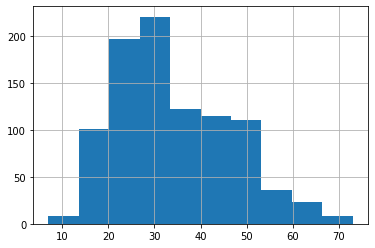

In [159]:
# Draw a histogram of a column (the distribution of ages).
users.age.hist();

**Count the number of occurrences of each value.**

In [160]:
users.gender.value_counts()     # Most useful for categorical variables

M    670
F    273
Name: gender, dtype: int64

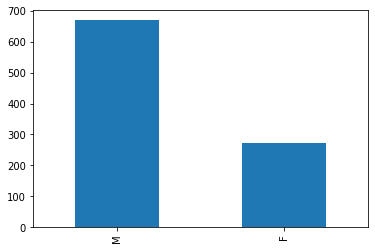

In [161]:
users.gender.value_counts().plot(kind='bar')     # Quick plot by category

In [162]:
# Can also be used with numeric variables
#   Try .sort_index() to sort by indices or .sort_values() to sort by counts.
users.age.value_counts()

30    39
25    38
22    37
28    36
27    35
26    34
24    33
29    32
20    32
32    28
23    28
35    27
21    27
33    26
31    25
19    23
44    23
39    22
40    21
36    21
42    21
51    20
50    20
48    20
49    19
37    19
18    18
34    17
38    17
45    15
      ..
47    14
43    13
46    12
53    12
55    11
41    10
57     9
60     9
52     6
56     6
15     6
13     5
16     5
54     4
63     3
14     3
65     3
70     3
61     3
59     3
58     3
64     2
68     2
69     2
62     2
11     1
10     1
73     1
66     1
7      1
Name: age, Length: 61, dtype: int64

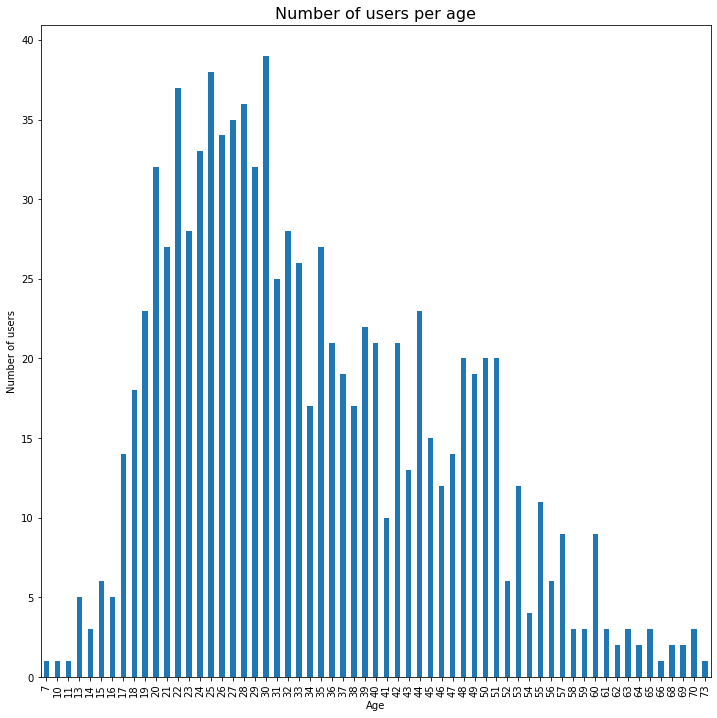

In [163]:
users.age.value_counts().sort_index().plot(kind='bar', figsize=(12,12));     # Bigger plot by increasing age
plt.xlabel('Age');
plt.ylabel('Number of users');
plt.title('Number of users per age', fontsize = 16);

<a id="exercise-one"></a>
### Exercise 1

In [164]:
pwd

'C:\\Users\\Jack Ozaroff\\DAT-course-materials-9-17-19\\lessons\\required\\exploratory-data-analysis\\practice\\j-ozaroff'

In [165]:
# Read drinks.csv into a DataFrame called "drinks".
import pandas as pd
drinks = pd.read_csv('../../data/drinks.csv')

In [166]:
# Print the head and the tail.
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [167]:
drinks.tail()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF
192,Zimbabwe,64,18,4,4.7,AF


In [168]:
# Examine the default index, datatypes, and shape.
drinks.index

RangeIndex(start=0, stop=193, step=1)

In [169]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [170]:
drinks.shape

(193, 6)

In [171]:
# Print the beer_servings Series.
drinks[['beer_servings']].head()

,beer_servings
0,0
1,89
2,25
3,245
4,217


In [172]:
# Calculate the average beer_servings for the entire data set.
drinks[['beer_servings']].mean()

beer_servings    106.160622
dtype: float64

In [173]:
# Count the number of occurrences of each "continent" value and see if it looks correct.
drinks['continent'].value_counts()

AF    53
EU    45
AS    44
OC    16
SA    12
Name: continent, dtype: int64

<a id="filtering-and-sorting"></a>
### Filtering and Sorting
- **Objective:** Filter and sort data using Pandas.

We can use simple operator comparisons on columns to extract relevant or drop irrelevant information.

**Logical filtering: Only show users with age < 20.**

In [174]:
# Create a Series of Booleans…
# In Pandas, this comparison is performed element-wise on each row of data.
users[users['age'] < 20].head()

,user_id,age,gender,occupation,zip_code
29,30,7,M,student,55436
35,36,19,F,student,93117
51,52,18,F,student,55105
56,57,16,M,none,84010
66,67,17,M,student,60402


In [175]:
users.age < 20

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29      True
       ...  
913    False
914    False
915    False
916    False
917    False
918    False
919    False
920    False
921    False
922    False
923    False
924     True
925    False
926    False
927    False
928    False
929    False
930    False
931    False
932    False
933    False
934    False
935    False
936    False
937    False
938    False
939    False
940    False
941    False
942    False
Name: age, Length: 943, dtype: bool

In [176]:
# …and use that Series to filter rows.
# In Pandas, indexing a DataFrame by a Series of Booleans only selects rows that are True in the Boolean.
mask = users.age < 20
users[mask].head()

,user_id,age,gender,occupation,zip_code
29,30,7,M,student,55436
35,36,19,F,student,93117
51,52,18,F,student,55105
56,57,16,M,none,84010
66,67,17,M,student,60402


In [177]:
# Or, combine into a single step.
mask = users.occupation == 'student'
student_frame = users[mask]
student_frame.tail()

#student_frame.index[0]

,user_id,age,gender,occupation,zip_code
927,928,21,M,student,55408
932,933,28,M,student,48105
938,939,26,F,student,33319
940,941,20,M,student,97229
942,943,22,M,student,77841


In [178]:
# Important: This creates a view of the original DataFrame, not a new DataFrame.
# If you alter this view (e.g., by storing it in a variable and altering that)
# You will alter only the slice of the DataFrame and not the actual DataFrame itself
# Here, notice that Pandas gives you a SettingWithCopyWarning to alert you of this.

# It is best practice to use .loc --> (this is apparently the fastest) and .iloc instead of the syntax below

student_frame['age'] = 12

C:\Users\Jack Ozaroff\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [179]:
# Select one column from the filtered results.
#student_frame.iloc[:5, :2]
users.loc[8, 'age'] = 12


In [180]:
# value_counts of resulting Series
users.age.unique()

array([24, 53, 23, 33, 42, 57, 36, 12, 39, 28, 47, 45, 49, 21, 30, 35, 40,
       26, 25, 32, 41,  7, 38, 20, 19, 29, 27, 18, 22, 37, 16, 50, 31, 51,
       17, 48, 34, 43, 60, 55, 15, 61, 44, 54, 59, 46, 13, 52, 56, 14, 66,
       62, 11, 65, 68, 63, 64, 10, 73, 58, 69, 70], dtype=int64)

**Logical filtering with multiple conditions**

In [181]:
# Ampersand for `AND` condition. (This is a "bitwise" `AND`.)
# Important: You MUST put parentheses around each expression because `&` has a higher precedence than `<`.
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [182]:
# Pipe for `OR` condition. (This is a "bitwise" `OR`.)
# Important: You MUST put parentheses around each expression because `|` has a higher precedence than `<`.
mask = (drinks.beer_servings > 25) & (drinks.continent == 'EU')
drinks[mask].head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
1,Albania,89,132,54,4.9,EU
3,Andorra,245,138,312,12.4,EU
9,Austria,279,75,191,9.7,EU
15,Belarus,142,373,42,14.4,EU
16,Belgium,295,84,212,10.5,EU


In [183]:
mask = (drinks.beer_servings > 25) & (drinks.continent == 'EU') | (drinks.wine_servings > 200)
drinks[mask].head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
1,Albania,89,132,54,4.9,EU
3,Andorra,245,138,312,12.4,EU
6,Argentina,193,25,221,8.3,SA
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [184]:
# Preferred alternative to multiple `OR` conditions
#users[users.occupation.isin(['doctor', 'lawyer'])]
users[['age', 'gender', 'occupation']].head() #--> you can reorder the attributes here by changing the order

,age,gender,occupation
0,24,M,technician
1,53,F,other
2,23,M,writer
3,24,M,technician
4,33,F,other


In [185]:
a = ['a', 'b', 'c', 10]
for entry in a:
    if entry in users.age:
        print(entry)
        
#this is checking to see if any of the elements of a are found within age

10


**Sorting**

In [186]:
# Sort a Series.
users.age.sort_values()
# def jacob_fun(a = True):
#     '''
#     This is a function that has a docstring.
#     Like they all should.
#     '''
#     pass

29      7
470    10
288    11
8      12
627    13
879    13
608    13
141    13
673    13
812    14
205    14
886    14
178    15
848    15
617    15
100    15
280    15
460    15
56     16
579    16
549    16
450    16
433    16
620    17
618    17
760    17
374    17
645    17
903    17
396    17
       ..
89     60
930    60
307    60
899    60
693    60
468    60
751    60
463    60
933    61
105    61
350    61
519    62
265    62
857    63
776    63
363    63
844    64
422    64
650    65
317    65
563    65
210    66
572    68
348    68
558    69
584    69
766    70
859    70
802    70
480    73
Name: age, Length: 943, dtype: int64

In [187]:
users.sort_values('age', inplace = True)
users

,user_id,age,gender,occupation,zip_code
29,30,7,M,student,55436
470,471,10,M,student,77459
288,289,11,M,none,94619
8,9,12,M,student,01002
627,628,13,M,none,94306
879,880,13,M,student,83702
608,609,13,F,student,55106
141,142,13,M,other,48118
673,674,13,F,student,55337
812,813,14,F,student,02136


In [188]:
users.age.sort_values(inplace = True)

#there is nothing to actually sort as the table is already being sliced

ValueError: This Series is a view of some other array, to sort in-place you must create a copy

In [ ]:
# Sort a DataFrame by a single column.
g = users.age
#users.sort_values('age')
id(g)

In [ ]:
id(users.age)

In [ ]:
g.sort_values(inplace = True)

#Throws an error b/c g just points back to users. To create a copy: user_copy = users.copy()

In [ ]:
# Use descending order instead.
users.sort_values('age', ascending=False).head()

In [ ]:
# Sort by multiple columns.
users.sort_values(['occupation', 'age'], ascending = [True, False]).head()

#will sort on occupation first and then sort on age

<a id="exercise-two"></a>
### Exercise 2
Use the `drinks.csv` or `drinks` `DataFrame` from earlier to complete the following.

In [ ]:
# Filter DataFrame to only include European countries.
drinks[drinks.continent == 'EU'].head()

In [ ]:
# Filter DataFrame to only include European countries with wine_servings > 300.
drinks[(drinks.continent == 'EU') & (drinks.wine_servings > 300)]

In [ ]:
# Calculate the average beer_servings for all of Europe.
mask = drinks.continent == 'EU'
drinks[mask]['beer_servings'].mean()

In [ ]:
# Determine which 10 countries have the highest total_litres_of_pure_alcohol.
big_drinkers = drinks.nlargest(10, 'total_litres_of_pure_alcohol')
big_drinkers

In [ ]:
big_drinkers

In [ ]:
d = drinks.sort_values('total_litres_of_pure_alcohol', ascending = False).iloc[:10]
d

In [ ]:
id(drinks)

In [ ]:
d.beer_servings = 19

<a id="columns"></a>
### Renaming, Adding, and Removing Columns

- **Objective:** Manipulate `DataFrame` columns.

In [ ]:
# Print the column labels
print(drinks.columns)

In [ ]:
# Rename one or more columns in a single output using value mapping.
drinks.rename(columns={'beer_servings':'beer', 'wine_servings':'wine'})

In [ ]:
# Rename one or more columns in the original DataFrame.
drinks.rename(columns={'beer_servings':'beer', 'wine_servings':'wine'}, inplace=True)

In [ ]:
# Replace all column names using a list of matching length.
drink_cols = ['country', 'beer', 'spirit', 'wine', 'liters', 'continent'] 

# Replace during file reading (disables the header from the file).
drinks = pd.read_csv('../../data/drinks.csv', header=0, names=drink_cols)

#can tell it what you want the column headers to be upfront

In [ ]:
drinks.head()

In [ ]:
# Replace after file has already been read into Python.
drinks.columns = drink_cols

**Easy Column Operations**<br>
Rather than having to reference indexes and create for loops to do column-wise operations, Pandas is smart and knows that when we add columns together we want to add the values in each row together.

In [ ]:
# Add a new column as a function of existing columns.
drinks['servings'] = drinks.beer + drinks.spirit + drinks.wine
drinks['mL'] = drinks.liters * 1000

drinks.head()



**Removing Columns**

In [ ]:
# axis=0 for rows, 1 for columns

# drinks.drop(drinks[drinks.spirit == 138].index.values[0])
drinks.drop(13)
drinks.iloc[13]

#.drop(13) removes the 13th index

In [ ]:
# Drop multiple columns.
drinks.drop(['mL', 'servings'], axis=1)

#brackets tell it that there is a list of items we want to get rid of. Axis=1 refers back to column header.

In [ ]:
# Drop on the original DataFrame rather than returning a new one.
drinks.drop(['mL', 'servings'], axis=1, inplace=True)

<a id="missing-values"></a>
### Handling Missing Values

- **Objective:** Know how to handle null and missing values.

Sometimes, values will be missing from the source data or as a byproduct of manipulations. It is very important to detect missing data. Missing data can:

- Make the entire row ineligible to be training data for a model.
- Hint at data-collection errors.
- Indicate improper conversion or manipulation.
- Actually not be missing — it sometimes means "zero," "false," "not applicable," or "entered an empty string."

For example, a `.csv` file might have a missing value in some data fields:

```
tool_name,material,cost
hammer,wood,8
chainsaw,,
wrench,metal,5
```

When this data is imported, "null" values will be stored in the second row (in the "material" and "cost" columns).

> In Pandas, a "null" value is either `None` or `np.NaN` (Not a Number). Many fixed-size numeric datatypes (such as integers) do not have a way of representing `np.NaN`. So, numeric columns will be promoted to floating-point datatypes that do support it. For example, when importing the `.csv` file above:

> - **For the second row:** `None` will be stored in the "material" column and `np.NaN` will be stored in the "cost" column. The entire "cost" column (stored as a single `ndarray`) must be stored as floating-point values to accommodate the `np.NaN`, even though an integer `8` is in the first row.

In [ ]:
# Missing values are usually excluded in calculations by default.
drinks.continent.value_counts()              # Excludes missing values in the calculation

In [ ]:
# Includes missing values
drinks.continent.value_counts(dropna=False)

In [ ]:
# Find missing values in a Series.
# True if missing, False if not missing
drinks.continent.isnull().sum()

In [ ]:
# Count the missing values — sum() works because True is 1 and False is 0.
drinks.continent.isnull().sum()

In [ ]:
# True if not missing, False if missing
drinks.continent.notnull()

In [ ]:
# Only show rows where continent is not missing.
drinks[drinks.continent.notnull()].head()

**Understanding Pandas Axis**

In [ ]:
# Sums "down" the 0 axis (rows) — so, we get the sums of each column
drinks.sum(axis=0)

In [ ]:
# axis=0 is the default.
drinks.sum()

In [ ]:
# Sums "across" the 1 axis (columns) — so, we get the sums of numeric values in the row (beer+spirit+wine+liters+…)
drinks['wine_liters'] = drinks[['wine', 'liters']].sum(axis=1)

In [ ]:
drinks.wine_liters

**Find missing values in a `DataFrame`.**

In [ ]:
# DataFrame of Booleans
drinks.info()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64


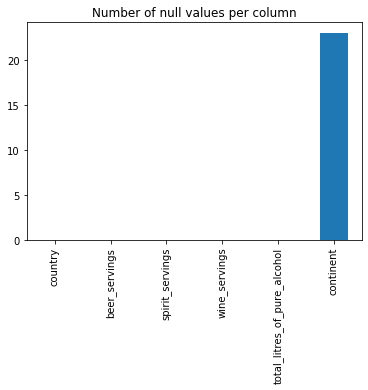

In [190]:
# Count the missing values in each column — remember by default, axis=0.
print((drinks.isnull().sum()))

drinks.isnull().sum().plot(kind='bar');         # visually
plt.title('Number of null values per column');

**Dropping Missing Values**

In [189]:
# Drop a row if ANY values are missing from any column — can be dangerous!
drinks.dropna()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU
10,Azerbaijan,21,46,5,1.3,EU


In [ ]:
# Drop a row only if ALL values are missing.
drinks.dropna(how='all')

**Filling Missing Values**<br>
You may have noticed that the continent North America (NA) does not appear in the `continent` column. Pandas read in the original data and saw "NA", thought it was a missing value, and converted it to a `NaN`, missing value.

In [191]:
# Fill in missing values with "NA" — this is dangerous to do without manually verifying them!
drinks.continent.fillna(value='NA')

0      AS
1      EU
2      AF
3      EU
4      AF
5      NA
6      SA
7      EU
8      OC
9      EU
10     EU
11     NA
12     AS
13     AS
14     NA
15     EU
16     EU
17     NA
18     AF
19     AS
20     SA
21     EU
22     AF
23     SA
24     AS
25     EU
26     AF
27     AF
28     AF
29     AF
       ..
163    SA
164    AF
165    EU
166    EU
167    AS
168    AS
169    AS
170    EU
171    AS
172    AF
173    OC
174    NA
175    AF
176    AS
177    AS
178    OC
179    AF
180    EU
181    AS
182    EU
183    AF
184    NA
185    SA
186    AS
187    OC
188    SA
189    AS
190    AS
191    AF
192    AF
Name: continent, Length: 193, dtype: object

In [192]:
# Modifies "drinks" in-place
drinks.continent.fillna(value='NA', inplace=True)

In [194]:
# Turn off the missing value filter — this is a better approach!
drinks = pd.read_csv('../../data/drinks.csv', header=0, names=drink_cols, na_filter=False)

In [195]:
drinks.continent.value_counts()

AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: continent, dtype: int64

In [196]:
drinks.isnull().sum()

country      0
beer         0
spirit       0
wine         0
liters       0
continent    0
dtype: int64

<a id="exercise-three"></a>
### Exercise 3

In [221]:
# Read ufo.csv into a DataFrame called "ufo".
ufo_data = '../../data/ufo.csv'
ufo = pd.read_csv(ufo_data)

In [199]:
# Check the shape of the DataFrame
ufo.shape

(80543, 5)

In [223]:
# What are the three most common colors reported?
ufo['Colors Reported'].value_counts().head(3)




ORANGE    5216
RED       4809
GREEN     1897
Name: Colors Reported, dtype: int64

In [234]:
# Rename any columns with spaces so that they don't contain spaces.
#ufo.rename(colums={'Colors Supported': 'colors'}, inplace)


for col in ufo.columns:
    print(col,lower().replace(' ', '_'))
    ufo[col] = col.lower().replace(' ','_')

NameError: name 'lower' is not defined

In [230]:
# For reports in VA, what's the most common city?
ufo.loc[ufo['state'] == 'VA', 'city'].value_counts().head(1)

KeyError: 'state'

In [232]:
# Print a DataFrame containing only reports from Arlington, VA.
ufo.loc[((ufo['state'] == 'VA') & (ufo['city'] == 'Arlington'))]

KeyError: 'state'

In [231]:
# Count the number of missing values in each column.
ufo.isnull().sum()

City                  47
Colors Reported    63509
Shape Reported      8402
State                  0
Time                   0
dtype: int64

In [233]:
# How many rows remain if you drop all rows with any missing values?
ufo.dropna().shape

(15510, 5)

<a id="split-apply-combine"></a>
### Split-Apply-Combine

Split-apply-combine is a pattern for analyzing data. Suppose we want to find mean beer consumption per country. Then:

- **Split:** We group data by continent.
- **Apply:** For each group, we apply the `mean()` function to find the average beer consumption.
- **Combine:** We now combine the continent names with the `mean()`s to produce a summary of our findings.

In [235]:
# For each continent, calculate the mean beer servings.
drinks.groupby('continent').beer.mean()

# or drinks.groupby('continent').mean()['beer']

continent
AF     61.471698
AS     37.045455
EU    193.777778
NA    145.434783
OC     89.687500
SA    175.083333
Name: beer, dtype: float64

In [236]:
# For each continent, calculate the mean of all numeric columns.
drinks.groupby('continent').mean()

,beer,spirit,wine,liters
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
NA,145.434783,165.739130,24.521739,5.995652
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


In [237]:
# For each continent, describe beer servings.
drinks.groupby('continent').beer.describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,61.471698,80.557816,0.0,15.00,32.0,76.00,376.0
AS,44.0,37.045455,49.469725,0.0,4.25,17.5,60.50,247.0
EU,45.0,193.777778,99.631569,0.0,127.00,219.0,270.00,361.0
NA,23.0,145.434783,79.621163,1.0,80.00,143.0,198.00,285.0
OC,16.0,89.687500,96.641412,0.0,21.00,52.5,125.75,306.0
SA,12.0,175.083333,65.242845,93.0,129.50,162.5,198.00,333.0


In [238]:
# Similar, but outputs a DataFrame and can be customized — "agg" allows you to aggregate results of Series functions
drinks.groupby('continent').beer.agg(['count', 'mean', 'min', 'max'])
drinks.groupby('continent').beer.agg(['count', 'mean', 'min', 'max']).sort_values('mean')

,count,mean,min,max
continent,,,,
AS,44,37.045455,0,247
AF,53,61.471698,0,376
OC,16,89.687500,0,306
NA,23,145.434783,1,285
SA,12,175.083333,93,333
EU,45,193.777778,0,361


In [239]:
# For each continent, describe all numeric columns.
drinks.groupby('continent').describe()

#or drinks.groupby('continent').describe().transpose

beer                                                             \
          count        mean        std   min     25%    50%     75%    max   
continent                                                                    
AF         53.0   61.471698  80.557816   0.0   15.00   32.0   76.00  376.0   
AS         44.0   37.045455  49.469725   0.0    4.25   17.5   60.50  247.0   
EU         45.0  193.777778  99.631569   0.0  127.00  219.0  270.00  361.0   
NA         23.0  145.434783  79.621163   1.0   80.00  143.0  198.00  285.0   
OC         16.0   89.687500  96.641412   0.0   21.00   52.5  125.75  306.0   
SA         12.0  175.083333  65.242845  93.0  129.50  162.5  198.00  333.0   

          spirit              ...    wine        liters                      \
           count        mean  ...     75%    max  count      mean       std   
continent                     ...                                             
AF          53.0   16.339623  ...   13.00  233.0   53.0  3.007547  2.647557   
AS          44.0   60.840909  ...    8.00  123.0   44.0  2.170455  2.770239   
EU          45.0  132.555556  ...  195.00  370.0   45.0  8.617778  3.358455   
NA          23.0  165.739130  ...   34.00  100.0   23.0  5.995652  2.409353   
OC          16.0   58.437500  ...   23.25  212.0   16.0  3.381250  3.345688   
SA          12.0  114.750000  ...   98.50  221.0   12.0  6.308333  1.531166   

                                           
           min   25%    50%     75%   max  
continent                                  
AF         0.0  0.70   2.30   4.700   9.1  
AS         0.0  0.10   1.20   2.425  11.5  
EU         0.0  6.60  10.00  10.900  14.4  
NA         2.2  4.30   6.30   7.000  11.9  
OC         0.0  1.00   1.75   6.150  10.4  
SA         3.8  5.25   6.85   7.375   8.3  

[6 rows x 32 columns]

In [240]:
# For each continent, count the number of rows.
print((drinks.groupby('continent').continent.count()))
print((drinks.continent.value_counts()))   # should be the same

continent
AF    53
AS    44
EU    45
NA    23
OC    16
SA    12
Name: continent, dtype: int64
AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: continent, dtype: int64


<a id="exercise-four"></a>
### Exercise 4

Use the "users" `DataFrame` or "users" file in the Data folder to complete the following.

In [251]:
# For each occupation in "users", count the number of occurrences.
users['occupation'].value_counts()

student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
artist            28
technician        27
marketing         26
entertainment     18
healthcare        16
retired           14
lawyer            12
salesman          12
none               9
homemaker          7
doctor             7
Name: occupation, dtype: int64

In [243]:
# For each occupation, calculate the mean age.
users.groupby('occupation').mean()['age']

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          21.994898
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [253]:
# For each occupation, calculate the minimum and maximum ages.
users.groupby('occupation')['age'].agg(['min', 'max'])



,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [249]:
# For each combination of occupation and gender, calculate the mean age.
users.groupby(['occupation', 'gender']).mean()['age']

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

----

<a id="multiple-columns"></a>
### Selecting Multiple Columns and Filtering Rows

In [254]:
# Select multiple columns — yet another overload of the DataFrame indexing operator!
my_cols = ['City', 'State']     # Create a list of column names...
ufo[my_cols]                    # ...and use that list to select columns.

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY
5,Valley City,ND
6,Crater Lake,CA
7,Alma,MI
8,Eklutna,AK
9,Hubbard,OR


In [256]:
# Or, combine into a single step (this is a Python list inside of the Python index operator!).
ufo[['City', 'State']]

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY
5,Valley City,ND
6,Crater Lake,CA
7,Alma,MI
8,Eklutna,AK
9,Hubbard,OR


**Use `loc` to select columns by name.**

In [255]:
# "loc" locates the values from the first parameter (colon means "all rows"), and the column "City".
ufo.loc[:, 'City']  

0                      Ithaca
1                 Willingboro
2                     Holyoke
3                     Abilene
4        New York Worlds Fair
5                 Valley City
6                 Crater Lake
7                        Alma
8                     Eklutna
9                     Hubbard
10                    Fontana
11                   Waterloo
12                     Belton
13                     Keokuk
14                  Ludington
15                Forest Home
16                Los Angeles
17                  Hapeville
18                     Oneida
19                 Bering Sea
20                   Nebraska
21                        NaN
22                        NaN
23                  Owensboro
24                 Wilderness
25                  San Diego
26                 Wilderness
27                     Clovis
28                 Los Alamos
29               Ft. Duschene
                 ...         
80513              Manahawkin
80514             New Bedford
80515     

In [257]:
# Select two columns.
ufo.loc[:, ['City', 'State']]

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY
5,Valley City,ND
6,Crater Lake,CA
7,Alma,MI
8,Eklutna,AK
9,Hubbard,OR


In [258]:
# Select a range of columns — unlike Python ranges, Pandas index ranges INCLUDE the final column in the range.
ufo.loc[:, 'City':'State']

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO
3,Abilene,NaN,DISK,KS
4,New York Worlds Fair,NaN,LIGHT,NY
5,Valley City,NaN,DISK,ND
6,Crater Lake,NaN,CIRCLE,CA
7,Alma,NaN,DISK,MI
8,Eklutna,NaN,CIGAR,AK
9,Hubbard,NaN,CYLINDER,OR


In [259]:
# "loc" can also filter rows by "name" (the index).
# Row 0, all columns
ufo.loc[0, :]

City                       Ithaca
Colors Reported               NaN
Shape Reported           TRIANGLE
State                          NY
Time               6/1/1930 22:00
Name: 0, dtype: object

In [260]:
# Rows 0/1/2, all columns
ufo.loc[0:2, :]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [261]:
# Rows 0/1/2, range of columns
ufo.loc[0:2, 'City':'State'] 

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO


In [262]:
# Use "iloc" to filter rows and select columns by integer position.
# (Remember that rows/columns use indices, so "iloc" lets you refer to indices via their index rather than value!)
# All rows, columns in position 0/3 (City/State)
ufo.iloc[:, [0, 3]]

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY
5,Valley City,ND
6,Crater Lake,CA
7,Alma,MI
8,Eklutna,AK
9,Hubbard,OR


In [263]:
# All rows, columns in position 0/1/2/3
# Note here it is NOT INCLUDING 4 because this is an integer range, not a Pandas index range!
ufo.iloc[:, 0:4]

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO
3,Abilene,NaN,DISK,KS
4,New York Worlds Fair,NaN,LIGHT,NY
5,Valley City,NaN,DISK,ND
6,Crater Lake,NaN,CIRCLE,CA
7,Alma,NaN,DISK,MI
8,Eklutna,NaN,CIGAR,AK
9,Hubbard,NaN,CYLINDER,OR


In [264]:
# Rows in position 0/1/2, all columns
ufo.iloc[0:3, :] 

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


<a id="joining-dataframes"></a>
### Joining (Merging) `DataFrames`

In [268]:
import pandas as pd
movie_cols = ['movie_id', 'title']
movies_filename = '../../data/movies.tbl'

movies = pd.read_table(
    movies_filename,
    sep='|',
    header=None,
    names=movie_cols,
    usecols=[0, 1],
    encoding='latin-1')

movies.head()

C:\Users\Jack Ozaroff\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: read_table is deprecated, use read_csv instead.
  # This is added back by InteractiveShellApp.init_path()


,movie_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [271]:
rating_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings_filename = '../../data/movie_ratings.tsv'

ratings = pd.read_table(ratings_filename, sep='\t', header=None, names=rating_cols)
ratings.head()

C:\Users\Jack Ozaroff\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: read_table is deprecated, use read_csv instead.
  after removing the cwd from sys.path.


,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [272]:
# Merge "movies" and "ratings" (inner join on "movie_id").
movie_ratings = pd.merge(movies, ratings)
movie_ratings.head()

,movie_id,title,user_id,rating,timestamp
0,1,Toy Story (1995),308,4,887736532
1,1,Toy Story (1995),287,5,875334088
2,1,Toy Story (1995),148,4,877019411
3,1,Toy Story (1995),280,4,891700426
4,1,Toy Story (1995),66,3,883601324


In [273]:
print(movies.shape)
print(ratings.shape)
print(movie_ratings.shape)

(1682, 2)
(100000, 4)
(100000, 5)


<a id="other-features"></a>
### OPTIONAL: Other Commonly Used Features

In [276]:
# Apply an arbitrary function to each value of a Pandas column, storing the result in a new column.
users['under30'] = users.age.apply(lambda age: age < 30)

#applies for each "lambda" and creates a new column

In [277]:
# Apply an arbitrary function to each row of a DataFrame, storing the result in a new column.
#  (Remember that, by default, axis=0. Since we want to go row by row, we set axis=1.)
users['under30male'] = users.apply(lambda row: (row.age < 30) and (row.gender) == 'M', axis=1)

In [278]:
# Map existing values to a different set of values.
users['is_male'] = users.gender.map({'F':0, 'M':1})
users

,user_id,age,gender,occupation,zip_code,under30,under30male,is_male
29,30,7,M,student,55436,True,True,1
470,471,10,M,student,77459,True,True,1
288,289,11,M,none,94619,True,True,1
8,9,12,M,student,01002,True,True,1
627,628,13,M,none,94306,True,True,1
879,880,13,M,student,83702,True,True,1
608,609,13,F,student,55106,True,False,0
141,142,13,M,other,48118,True,True,1
673,674,13,F,student,55337,True,False,0
812,813,14,F,student,02136,True,False,0


In [ ]:
# Replace all instances of a value in a column (must match entire value).
ufo.State.replace('Fl', 'FL', inplace=True)

In [ ]:
# String methods are accessed via "str".
ufo.State.str.upper()                               # Converts to upper case
# checks for a substring
ufo['Colors Reported'].str.contains('RED', na='False') 

In [ ]:
# Convert a string to the datetime format (this is often slow — consider doing it in the "read_csv()" method.)
ufo['Time'] = pd.to_datetime(ufo.Time)
ufo.Time.dt.hour                        # Datetime format exposes convenient attributes
(ufo.Time.max() - ufo.Time.min()).days  # Also allows you to do datetime "math"

In [ ]:
# Set and then remove an index.
ufo.set_index('Time', inplace=True)
ufo.reset_index(inplace=True)

In [ ]:
# Change the datatype of a column.
drinks['beer'] = drinks.beer.astype('float')

In [ ]:
# Create dummy variables for "continent" and exclude first dummy column.
continent_dummies = pd.get_dummies(drinks.continent, prefix='cont').iloc[:, 1:]

In [ ]:
# Concatenate two DataFrames (axis=0 for rows, axis=1 for columns).
drinks = pd.concat([drinks, continent_dummies], axis=1)

<a id="uncommon-features"></a>
### OPTIONAL: Other Less-Used Features of Pandas

In [ ]:
# Detecting duplicate rows
users.duplicated()          # True if a row is identical to a previous row
users.duplicated().sum()    # Count of duplicates
users[users.duplicated()]   # Only show duplicates
users.drop_duplicates()     # Drop duplicate rows
users.age.duplicated()      # Check a single column for duplicates
users.duplicated(['age', 'gender', 'zip_code']).sum()   # Specify columns for finding duplicates

In [ ]:
# Convert a range of values into descriptive groups.
drinks['beer_level'] = 'low'    # Initially set all values to "low"
drinks.loc[drinks.beer.between(101, 200), 'beer_level'] = 'med'     # Change 101-200 to "med"
drinks.loc[drinks.beer.between(201, 400), 'beer_level'] = 'high'    # Change 201-400 to "high"

In [ ]:
# Display a cross-tabulation of two Series.
pd.crosstab(drinks.continent, drinks.beer_level)

In [ ]:
# Convert "beer_level" into the "category" datatype.
drinks['beer_level'] = pd.Categorical(drinks.beer_level, categories=['low', 'med', 'high'])
drinks.sort_values('beer_level')   # Sorts by the categorical ordering (low to high)

In [ ]:
# Limit which rows are read when reading in a file — useful for large files!
pd.read_csv('data/drinks.csv', nrows=10)           # Only read first 10 rows
pd.read_csv('data/drinks.csv', skiprows=[1, 2])    # Skip the first two rows of data

In [ ]:
# Write a DataFrame out to a .csv
drinks.to_csv('drinks_updated.csv')                 # Index is used as first column
drinks.to_csv('drinks_updated.csv', index=False)    # Ignore index

In [ ]:
# Create a DataFrame from a dictionary.
pd.DataFrame({'capital':['Montgomery', 'Juneau', 'Phoenix'], 'state':['AL', 'AK', 'AZ']})

In [ ]:
# Create a DataFrame from a list of lists.
pd.DataFrame([['Montgomery', 'AL'], ['Juneau', 'AK'], ['Phoenix', 'AZ']], columns=['capital', 'state'])

In [ ]:
# Randomly sample a DataFrame.
import numpy as np
mask = np.random.rand(len(drinks)) < 0.66   # Create a Series of Booleans
train = drinks[mask]                        # Will contain around 66% of the rows
test = drinks[~mask]                        # Will contain the remaining rows

In [ ]:
# Change the maximum number of rows and columns printed ('None' means unlimited).
pd.set_option('max_rows', None)     # Default is 60 rows
pd.set_option('max_columns', None)  # Default is 20 columns
print(drinks)

In [ ]:
# Reset options to defaults.
pd.reset_option('max_rows')
pd.reset_option('max_columns')

In [ ]:
# Change the options temporarily (settings are restored when you exit the "with" block).
with pd.option_context('max_rows', None, 'max_columns', None):
    print(drinks)

<a id="summary"></a>
### Summary

Believe it or not, we've only barely touched the surface of everything that Pandas offers. Don't worry if you don't remember most of it — for now, just knowing what exists is key. Remember that the more you use Pandas to manipulate data, the more of these functions you will take interest in, look up, and remember.

In this notebook, the most important things to familiarize yourself with are the basics:
- Manipulating `DataFrames` and `Series`
- Filtering columns and rows
- Handling missing values
- Split-apply-combine (this one takes some practice!)